In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("Dataset/aps_failure_training_Set.csv", na_values="na")
test_df = pd.read_csv("Dataset/aps_failure_test_Set.csv", na_values="na")

In [4]:
train_df['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [5]:
train_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


### Handling Missing Values

In [4]:
train_df.isnull().sum().sort_values(ascending=False)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
          ...  
cj_000      338
ci_000      338
bt_000      167
aa_000        0
class         0
Length: 171, dtype: int64

In [5]:
train_df.isnull().mean()

class     0.000000
aa_000    0.000000
ab_000    0.772150
ac_000    0.055583
ad_000    0.247683
            ...   
ee_007    0.011183
ee_008    0.011183
ee_009    0.011183
ef_000    0.045400
eg_000    0.045383
Length: 171, dtype: float64

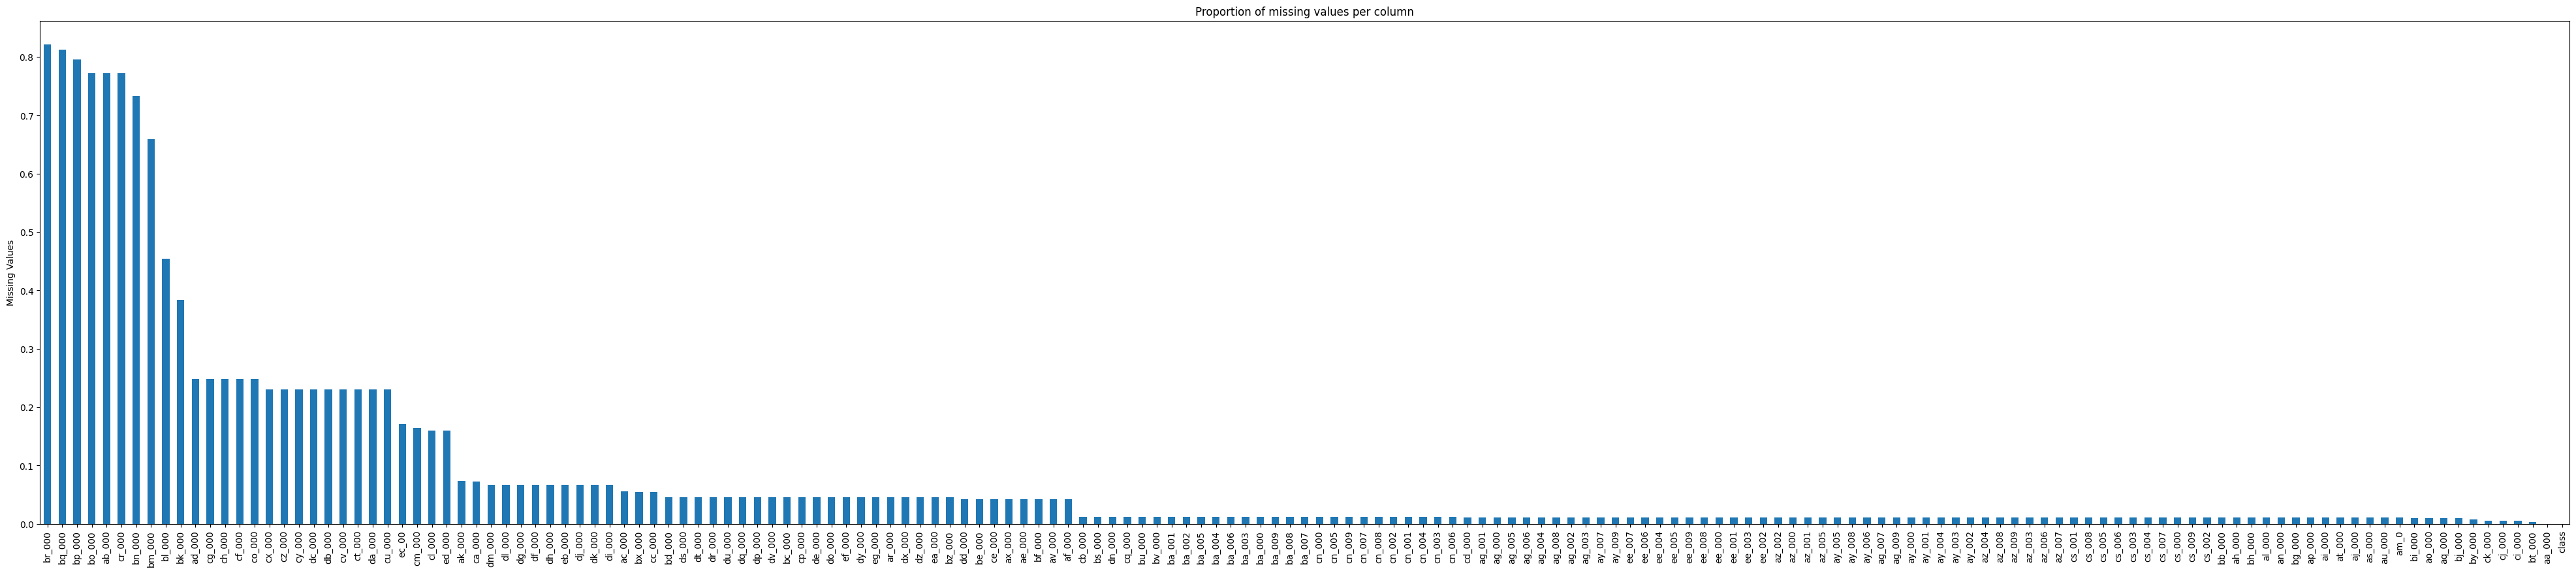

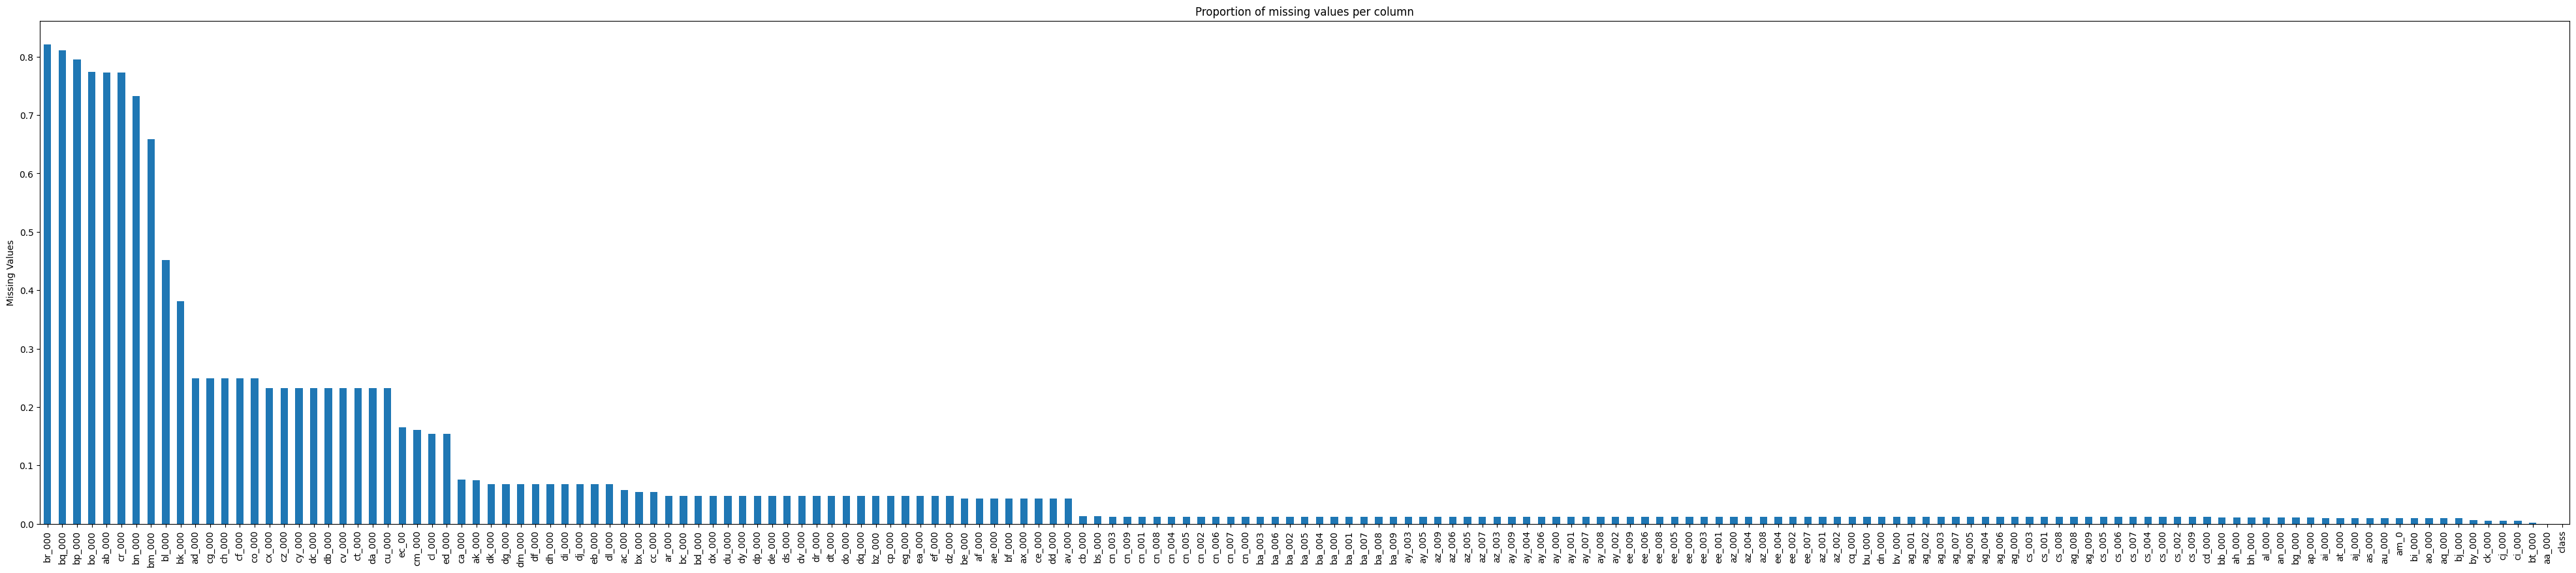

In [6]:
train_missing = train_df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(50,10))
train_missing.plot(kind='bar')
plt.title("Proportion of missing values per column")
plt.ylabel("Missing Values")
plt.show()

test_missing = test_df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(50,10))
test_missing.plot(kind='bar')
plt.title("Proportion of missing values per column")
plt.ylabel("Missing Values")
plt.show()

In [7]:
train_drop_col = train_missing[train_missing > 0.50].index
train_df = train_df.drop(columns=train_drop_col)

test_drop_col = test_missing[test_missing > 0.50].index
test_df = test_df.drop(columns=test_drop_col)

In [8]:
train_df.shape

(60000, 163)

In [9]:
test_df.shape

(16000, 163)

### Encoding of Class (Target) Variable

In [10]:
train_df["class"] = train_df["class"].map({"neg": 0, "pos": 1})
test_df["class"] = test_df["class"].map({"neg": 0, "pos": 1})

### Median Imputation - Best for Outliers

In [11]:
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())

In [12]:
train_df["class"].values

array([0, 0, 0, ..., 0, 0, 0], shape=(60000,))

In [13]:
X_train = train_df.drop("class", axis=1).values
y_train = train_df["class"].values

X_test = test_df.drop("class", axis=1).values
y_test = test_df["class"].values

### Standardizing independent feature valuers 

In [14]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / (std + 1e-8)
X_test = (X_test - mean) / (std + 1e-8)

In [15]:
train_df['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

### Split the data into Training and Validation

In [16]:
def stratified_split(X, y, ratio=0.2, seed=42):
    np.random.seed(seed)
    unique_classes = np.unique(y)
    
    train_ids, val_ids = [], []
    for cls in unique_classes:
        cls_ids = np.where(y == cls)[0]
        np.random.shuffle(cls_ids)
        val_size = int(len(cls_ids) * ratio)
        val_ids.extend(cls_ids[:val_size])
        train_ids.extend(cls_ids[val_size:])
    
    np.random.shuffle(train_ids)
    np.random.shuffle(val_ids)
    
    return (
        X[train_ids], X[val_ids],
        y[train_ids], y[val_ids]
    )

X_train, X_val, y_train, y_val = stratified_split(X_train, y_train, ratio=0.2)

print("Class distribution in training:", np.bincount(y_train))
print("Class distribution in validation:", np.bincount(y_val))


Class distribution in training: [47200   800]
Class distribution in validation: [11800   200]


### Oversampling of Minority Class - Reduce highly Imbalance

In [17]:
#SMOTE
from imblearn.over_sampling import SMOTE

current_minority = np.sum(y_train == 1)
updated_minority = 10 * current_minority

smote = SMOTE(sampling_strategy={1: updated_minority}, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original class distribution:", np.bincount(y_train))
print("After SMOTE balancing:", np.bincount(y_train_bal))


Original class distribution: [47200   800]
After SMOTE balancing: [47200  8000]


### Logistic Regression

In [18]:
class LogisticRegression:
    def __init__(self, eta=0.01, epochs=1000):
        self.eta = eta
        self.epochs = epochs
        self.W = None
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, X_val=None, y_val=None):
        N, D = X.shape
        self.W = np.zeros(D)
        self.b = 0

        # SGD Progression
        for epoch in range(self.epochs):
            # Linear model
            X_new = np.dot(X, self.W) + self.b
            y_pred = self.sigmoid(X_new)

            # Gradient calculation
            dw = (1/N) * np.dot(X.T, (y_pred - y))
            db = (1/N) * np.sum(y_pred - y)

            # Update params
            self.W -= self.eta * dw
            self.b -= self.eta * db

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def predict(self, X, threshold=0.5):
        return (self.forward(X) >= threshold).astype(int)


### Evaluation Metrics and Confusion Matrix

In [19]:
def evaluate(y_true, y_pred, plot_cm=True, title="Confusion Matrix"):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    print("\nConfusion Matrix Values:")
    print(f"TP: {TP} | FP: {FP}")
    print(f"FN: {FN} | TN: {TN}")
    
    if plot_cm:
        cm = np.array([[TP, FP],
                       [FN, TN]])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Predicted Positive", "Predicted Negative"],
                    yticklabels=["Actual Positive", "Actual Negative"])
        plt.title(title)
        plt.show()
    
    return accuracy, precision, recall, f1



Confusion Matrix Values:
TP: 166 | FP: 108
FN: 34 | TN: 11692


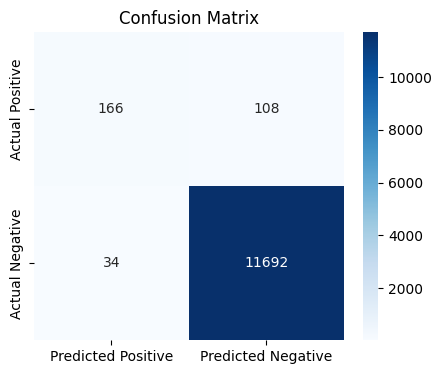


Validation Data Results: Acc=0.9882, Precision=0.6058, Recall=0.8300, F1=0.7004

Confusion Matrix Values:
TP: 323 | FP: 155
FN: 52 | TN: 15470


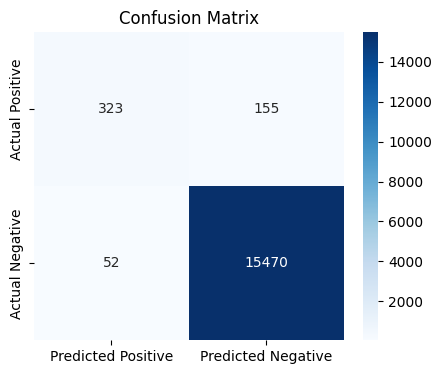


Test Data Results: Acc=0.9871, Precision=0.6757, Recall=0.8613, F1=0.7573


In [21]:
model = LogisticRegression(eta=0.05, epochs=2000)
model.fit(X_train_bal, y_train_bal, X_val, y_val)

# Evaluation on validation Data
y_val_pred = model.predict(X_val)
acc, prec, rec, f1 = evaluate(y_val, y_val_pred)
print(f"\nValidation Data Results: Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

# Evaluation on Test Data
y_test_pred = model.predict(X_test)
acc, prec, rec, f1 = evaluate(y_test, y_test_pred)
print(f"\nTest Data Results: Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

### Gaussian Naive Bayes

In [22]:
from scipy.stats import multivariate_normal as mvn

In [23]:
class GaussNB():

    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y == k]
            self.likelihoods[k] = {
                "mean": X_k.mean(axis=0),
                "cov": X_k.var(axis=0) + epsilon
            }
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)

In [24]:
gnb = GaussNB()

In [25]:
gnb.fit(X_train_bal, y_train_bal)

In [26]:
y_pred = gnb.predict(X_test)


Confusion Matrix Values:
TP: 343 | FP: 528
FN: 32 | TN: 15097


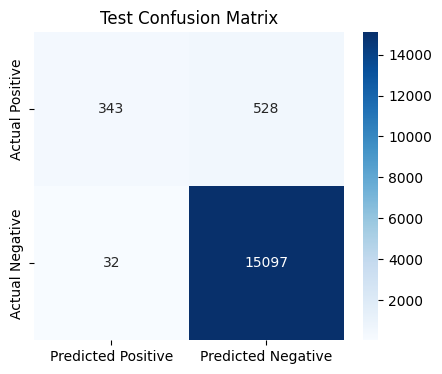


Test Results -> Acc=0.9650, Precision=0.3938, Recall=0.9147, F1=0.5506


In [27]:
acc, prec, rec, f1 = evaluate(y_test, y_pred, plot_cm=True, title="Test Confusion Matrix")
print(f"\nTest Results -> Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")